# **Chapter 1 : EMA Crossover**

### Let's begin by importing relevant libraries

**Pandas & Numpy** --> Data related operations and perfomance calculations

**pandas_datareader** --> Getting data from yfinance into Pandas

**talib** --> Calculating technical indicators 

**datetime** --> Performing efficient time-series based operations

**chart_studio & plotly** --> Plotting price and indicators data

In [1]:
import pandas as pd
import numpy as np 
import yfinance as yf 
import talib
import datetime as dt
from pandas_datareader import data as pdr

yf.pdr_override()
import pandas_ta as ta

import seaborn as sns

In [2]:
import chart_studio.plotly as py
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Getting Price Data

We will be using pandas datareader library to get data from Yahoo finance database for the **APPLE** stock. 
Running the below cell will ask for an input, we can add the ticker symbol of the stock we need the data for. In this case, the ticker symbol for APPLE stock is **AAPL**

In [3]:
ticker = input("Enter Stock Ticker : ")
print(ticker)

startyear=2012
startmonth=1
startday=1

start=dt.datetime(startyear,startmonth,startday)

end=dt.datetime.now()

df=pdr.get_data_yahoo(ticker,start,end)

Enter Stock Ticker :  AAPL


AAPL
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.540048,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.607434,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.747403,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.880661,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.860236,394024400


# Calculating Technical Indicators

## Moving Averages

Moving Average (also known as Rolling Averages) is simply the mean or average of an entity over a specified period of time. In our case, that entity is the stock price. 

There are three primary types of moving averages used when working with price data : 

1. Simple Moving Average (SMA)

2. Exponential Moving Average (EMA)

3. Weighted Moving Average (WMA)

In this strategy we'll be using the EMA, which is one of the most widely used type of moving averages.

### Simple Moving Average (SMA) 
 - A simple moving average is the conventional rolling average, wherein we take the average price over a period of time. 

*Example* : Say you need to calcuate SMA of closing price of a stock for a period of 10 days, also written as a 10-day SMA. The 10-day SMA is basically the average of the closing price over the last 10 days. 

### Exponential Moving Average (EMA)
 - An exponential moving average is similar to a simple moving average wherein the average price over a period of time is taken, but more weight is given to the current prices than the earlier prices, thus giving us a better view of the trend in which price for that security is moving. 

The highest weight is given to the most recent price and the weights reduce exponentially for prices going back in time.

### Weighted Moving Average (WMA)
 - A weighted moving average is similar to SMA, but like EMA takes in different weights for prices. The highest weight again is given to the most recent price, but here the weights decrease in an Arithmetic Progression instead.

*Example* :  In a 10-day WMA, the latest price will have a weight of 1, the price on the previous day will have a weight of n-1, and so on.


For implementing the EMA Crossover strategy, we'll be using **TA-Lib** library to calculate the values of 10-day EMA, 20-day EMA and 30-day EMA.

Ta-Lib Library : https://github.com/mrjbq7/ta-lib


In [5]:
data = pd.DataFrame({'Close' : df['Close'],
                     'EMA (10 days)' : talib.EMA(df['Close'], timeperiod = 10),
                     'EMA (20 days)' : talib.EMA(df['Close'], timeperiod = 20),
                     'EMA (30 days)' : talib.EMA(df['Close'], timeperiod = 30)})

In [6]:
data = data.reset_index().dropna(axis=0)

Now that we have calculated the 10, 20 and 30-day EMA for closing price of APPLE stock, let us have a look at how our dataframe.

In [7]:
data.head()

,Date,Close,EMA (10 days),EMA (20 days),EMA (30 days)
29,2012-02-14,18.195000,17.211895,16.542394,15.893667
30,2012-02-15,17.773930,17.314083,16.659683,16.014974
31,2012-02-16,17.936071,17.427172,16.781244,16.138916
32,2012-02-17,17.932858,17.519115,16.890921,16.254654
33,2012-02-21,18.387501,17.677003,17.033453,16.392257


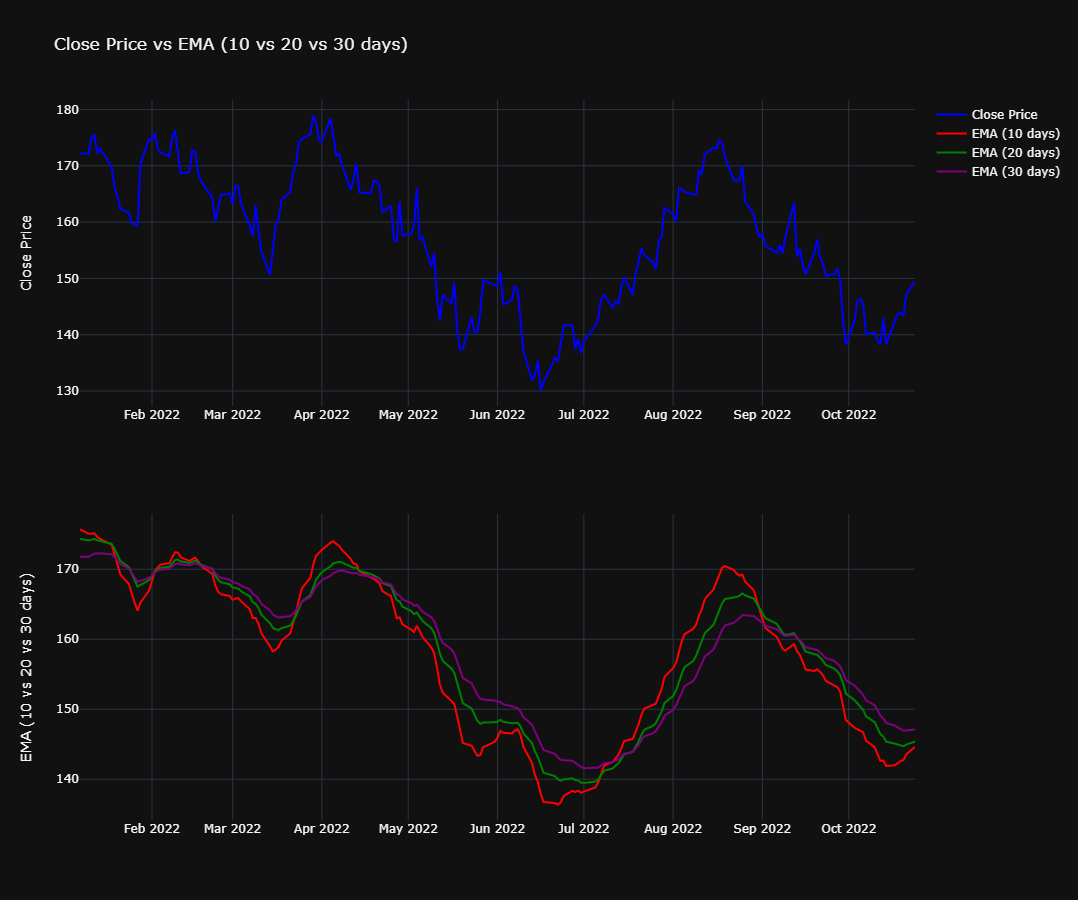

In [29]:

fig = make_subplots(rows=2,cols=1)
fig.add_trace(go.Scatter(x=data.iloc[-200:]['Date'],y=data.iloc[-200:]['Close'],name="Close Price",marker={'color': 'blue'}),row=1,col=1)
fig.add_trace(go.Scatter(x=data.iloc[-200:]['Date'],y=data.iloc[-200:]['EMA (10 days)'],name="EMA (10 days)",marker={'color': 'red'}),row=2,col=1)
fig.add_trace(go.Scatter(x=data.iloc[-200:]['Date'],y=data.iloc[-200:]['EMA (20 days)'],name="EMA (20 days)",marker = {'color' : 'green'}),row=2,col=1)
fig.add_trace(go.Scatter(x=data.iloc[-200:]['Date'],y=data.iloc[-200:]['EMA (30 days)'],name="EMA (30 days)",marker = {'color' : 'purple'}),row=2,col=1)

fig.update_yaxes(title_text="Close Price", row=1, col=1)
fig.update_yaxes(title_text="EMA (10 vs 20 vs 30 days)", row=2, col=1)
              
fig.update_layout(title='Close Price vs EMA (10 vs 20 vs 30 days)',height=900, width=1000,template = 'plotly_dark')   

The above code would plot the stock price and the 10,20 and 30 day EMAs for the same. I have zoomed in to the plot to get a better understanding of how do different EMAs differ and what it tells us about the price movements.

If you look carefully, the red line that represents the 10-day EMA moves very closely with the price, the green line representing the 20-day EMA is smoother than the red line, it seems to be picking the short term trend in which the price is moving and finally the purple line represents the 30-day EMA and it is a much smoother line that seems to represent an overall trend of what direction the stock is headed in.

This means that the 10-day EMA is the most sensitive to recent price changes and the 30-day EMA is the least sensitive. We'll use this to build our strategy wherein we'll add several conditions, which when fulfilled will generate **Buy** or **Sell** signals.

# Strategy and  Implementation

The EMA Crossover strategy is one of the simplest strategies to implement. Here, we generate **Buy** and **Sell** signals based on the positions of respective EMAs.

**Buy Signal** : A 'Buy' signal will be generated when the 10-day EMA is greater than both the 20-day EMA and the 30-day EMA :

 - **EMA (10 days) > EMA (20 days) > EMA (30 days)**

**Sell Signal** : A 'Sell' signal is generated when 30-day EMA is greater than 20-day EMA and 10-day EMA OR 20-day EMA is greater than the 30-day EMA and the 10-day EMA : 

 - **EMA (10 days) < EMA (20 days) < EMA (30 days)**  OR **EMA (10 days) < EMA (30 days) < EMA (20 days)**

Let's first start by creating a few empty lists. These lists will be appended as we iterate over our data.

 - **buy_calls** and **sell_calls** will record the kind of calls, i.e. 'Buy' or 'Sell' everytime when a condition for either is met.

 - **buy_prices** and **sell_prices** will record the prices at which those 'Buy' or 'Sell' signals have been trigerred.

 - **buy_dates** and **sell_dates** will record the dates at which those 'Buy' or 'Sell' signals have been trigerred.

 - **positions_list** will contain the type of position ('0' -> sell/exit (if long) otherwise 'No position' or '1' -> buy/long) and it will be appended with either of those values whenever there is a 'Buy' or a 'Sell' call. This can even be done away with but we'll be using them in our conditions when we try to implement some money management rules in our strategy going forward.

Further, we will also set the initial position to '0'. The reasoning for this is when we are performing backtesting we need to pick round-about trades. This means we get a buy call/enter a long position and then when the selling conditions are met we get a sell call/exit the long position.

So, for backtesting the first call we'll be considering is a buy call to go long into a trade and then the next call would be to sell or exit a trade.
Then, we'll use a for loop with if-else statements to iterate over our data and generate buy/sell calls based on the EMA indicator conditions we discussed above.

In [9]:
buy_calls = []
sell_calls = []

buy_prices = []
sell_prices = []

buy_dates = []
sell_dates = []

positions_list = [] 

pos = 0


Let's go ahead and write the for loop, within which we'll be adding the conditions for generating **Buy** and **Sell** signals. 
Also, in order to understand what exactly is going on the back when our loop iterates over the data to generate signals, let us also add a print statement that gives information on whenever a call is generated.

In [10]:
for i in data.index:
    if (data['EMA (10 days)'][i] > data['EMA (20 days)'][i] > data['EMA (30 days)'][i]):  # --(a)
        if (pos == 0):                                                                    # --(b)
            bp = data['Close'][i]                                                         # --(c)
            pos = 1                                                                       # --(d) 
            
            #print('Buy Call at '+str(bp)+' on '+ str(data['Date'][i]))                    # --(e) 
                        
            call_type = "buy"                                                             # --(f)
            buy_date = data['Date'][i]                                                    # --(g)

            positions_list.append(pos)                                                    # --(h)
            
            buy_calls.append(call_type)                                                   # --(i)
            buy_prices.append(bp)                                                         # --(j)
            buy_dates.append(buy_date)                                                    # --(k)
       
    if (data['EMA (10 days)'][i] < data['EMA (20 days)'][i] < data['EMA (30 days)'][i])\
      |(data['EMA (10 days)'][i] < data['EMA (30 days)'][i] < data['EMA (20 days)'][i]):
        if (pos == 1):
            sp = data['Close'][i] 
            pos = 0
            
            #print('Sell Call at '+str(sp)+' on '+ str(data['Date'][i]))
                        
            call_type = "sell"
            sell_date = data['Date'][i]

            positions_list.append(pos)
            
            sell_calls.append(call_type)
            sell_prices.append(sp)
            sell_dates.append(sell_date)
    

Let's now try to understand every line of code in the above cell. The first set of code within the if statement is to generate **Buy** signals and a similar set of code for generating **Sell** signals but with relevant selling conditions.

(a) - This line of code is the 'if' statement that consists of our **Buy** condition discussed earlier, which is **EMA (10 days) > EMA (20 days) > EMA       (30 days)**.

(b) - This 'if' statement makes sure a Buy signal is generated only when the current position is 0 which means that a buy signal shouldn't be               generated if the last signal generated was a buy signal there hasn't been a sell signal after that.

***If the conditions in (a) and (b) are met, a Buy signal will be generated.***

(c) - 'bp' here records the most recent Buy price of the buy call generated.

(d) - Now that we have gotten a buy call and have entered a long position, the most recent position needs to be updated to 1 from zero.

(e) - Print statement to print the details (Price, Date) of the buy call generated.

(f) - Records the type of call generated, here it'll be a buy call.

(g) - Records the date at which the buy call was generated.

(h),(i),(j) and (k) - Appends the empty lists we created before with details of the Buy Signal (Price, pos(updated position), Date, Call/Signal Type)

Now, let's add all the details for all buy and sell signals generated in two different dataframes, one for buy signals and other for sell signals. The reason for doing this is what's next.

In [11]:
buy_all = pd.DataFrame({'Calls':buy_calls,
                        'Date':buy_dates,
                        'Price':buy_prices,
                        })

sell_all = pd.DataFrame({'Calls':sell_calls,
                        'Date':sell_dates,
                        'Price':sell_prices,
                        })

### Accounting for Commissions

Now, that we have the buy and sell calls and the corresponding prices at which those calls were generated. We can now account for broker commissions and charges that you may incur when going in and out of trades.

I am considering the commission rates as :

 - **1% for Buy Orders**

 - **2% for Sell Orders**

This is highly subjective and can vary so you can make your own adjustments here.

In [12]:
buy_all['Price'] = buy_all['Price']*1.01 # 1% for Buy Orders
sell_all['Price'] = sell_all['Price']*0.98 # 2% for Sell Orders

Adding commissions helps us get a more precise P&L of our trades because if you would have taken these trades using the strategy in the past, you would have had to incur these costs as well.

Further, let's combine both types of calls in a single dataframe so that we have consecutive calls one below the other

In [13]:
all_calls = pd.concat(objs=[buy_all,sell_all],axis=0).sort_values('Date')

In [14]:
all_calls.head(6)

,Calls,Date,Price
0,buy,2012-02-14,18.376950
0,sell,2012-05-03,20.363700
1,buy,2012-06-18,21.129921
1,sell,2012-10-08,22.335950
2,buy,2013-05-07,16.544522
2,sell,2013-06-12,15.126650


The above dataframe is our final dataframe where we have all the trades that we would have taken if you had strictly followed this strategy for **AAPL** over the last 10 years.

Now, we need to know and summarize how good this strategy is for a stock (in our case 'Apple') if we were to take trades based on it.

# Strategy Perfomance - Calculating Backtesting Results

Before summarizing the perfomance of the strategy, we'll need to calculate and add 3 more columns to our final dataframe that will help us calculate the perfomance metrics for the strategy. The 3 columns are : 

 - **P&L (Amount)** : This is the profit or the loss amount on every trade

 - **P&L (%)** : This is the profit or loss percentage on every trade, also commonly known as % return on a trade

 - **Time in Trade**: This is the total time taken (in days) for a trade to complete, i.e. from a buy call to a subsequent sell call.

In [15]:
all_calls['P&L(Amount)'] = all_calls.groupby(all_calls.Calls.eq('buy').cumsum())['Price'].diff()
all_calls['P&L(%)'] = (all_calls.groupby(all_calls.Calls.eq('buy').cumsum())['Price'].pct_change())*100
all_calls['Time in Trade'] = all_calls.groupby(all_calls.Calls.eq('buy').cumsum())['Date'].diff()

In [16]:
all_calls.head(6)

,Calls,Date,Price,P&L(Amount),P&L(%),Time in Trade
0,buy,2012-02-14,18.376950,NaN,NaN,NaT
0,sell,2012-05-03,20.363700,1.986750,10.811098,79 days
1,buy,2012-06-18,21.129921,NaN,NaN,NaT
1,sell,2012-10-08,22.335950,1.206030,5.707688,112 days
2,buy,2013-05-07,16.544522,NaN,NaN,NaT
2,sell,2013-06-12,15.126650,-1.417872,-8.570037,36 days


As we can see in the above dataframe showing the first 3 trades in our backtest, we have the P&L(Amount), P&L(%) and Time in trade for all our trades.

Let's now proceed with calculating perfomance metrics for our strategy. We'll be calculating the following metrics : 

 - Number of Trades Taken : Number of trades that the EMA Crossover strategy would have taken in the stock over the backtest period.

 - Strategy Success Rate (%) : This is essentially the percentage of profitable trades, i.e. of all the trades taken during the backtest period, how many of them would have resulted in a profit.

 - Average Gain of all profitable trades (%) : Average profit percentage of all the trades where a profit was booked.

 - Maximum Gain of all profitable trades (%) : Maximum profit percentage of all the trades where a profit was booked.

 - Average Loss of all loss making trades (%) : Average loss percentage of all the trades where a loss was booked.

 - Maximum Loss of all loss making trades (%) : Maximum profit percentage of all the trades where a loss was booked.

 - Average Time in a trade (Days) : Average time taken for a trade to complete among all the trades taken during the backtest period.

In [17]:
print("Number of Trades Taken : {:.0f}".format(all_calls['Calls'].count()/2))

Number of Trades Taken : 36


In [18]:
print("Strategy Success Rate : {:.2f}%".format(((all_calls.loc[all_calls['P&L(%)']>=0]['P&L(%)'].count())\
                                               /(all_calls['P&L(%)'].count()))*100))

Strategy Success Rate : 47.22%


In [19]:
print("Average Gain of all profitable trades : {:.2f}%"\
      .format(all_calls.loc[all_calls['P&L(%)']>=0]['P&L(%)'].mean()))

Average Gain of all profitable trades : 11.91%


In [20]:
print("Maximum Gain of all profitable trades : {:.2f}%"\
      .format(all_calls.loc[all_calls['P&L(%)']>=0]['P&L(%)'].max()))

Maximum Gain of all profitable trades : 46.54%


In [21]:
print("Average Loss of all Loss making trades : {:.2f}%"\
      .format(all_calls.loc[all_calls['P&L(%)']<0]['P&L(%)'].mean()))

Average Loss of all Loss making trades : -6.27%


In [22]:
print("Maximum Loss of all Loss making trades : {:.2f}%"\
      .format(all_calls.loc[all_calls['P&L(%)']<0]['P&L(%)'].min()))

Maximum Loss of all Loss making trades : -11.64%


In [23]:
print("Average Time in a Trade : {:.0f} days"\
      .format(all_calls['Time in Trade'].dt.days.mean()))

Average Time in a Trade : 67 days


Let's put all these results of ours in a dataframe and visualize them better.

In [24]:
P_n_L = pd.DataFrame({'Strategy Success Rate (%)':round(all_calls.loc[all_calls['P&L(%)']>=0]['P&L(%)'].count()\
                                                        /(all_calls['P&L(%)'].count())*100,2),
                         'Avg. Gain of Profitable Trades (%)':round(all_calls.loc[all_calls['P&L(%)']>=0]['P&L(%)']\
                                                                    .mean(),2),
                         'Max. Gain of Profitable Trades (%)':round(all_calls.loc[all_calls['P&L(%)']>=0]['P&L(%)']\
                                                                    .max(),2),
                         'Avg. Loss of all loss making Trades (%)':round(all_calls.loc[all_calls['P&L(%)']<0]['P&L(%)']\
                                                                         .mean(),2),
                         'Max. Loss of all loss making Trades (%)':round(all_calls.loc[all_calls['P&L(%)']<0]['P&L(%)']\
                                                                         .min(),2),
                         'Number of Trades Taken':round((all_calls['Calls'].count()/2),0),
                         'Avg. Time in a Trade (days)':round(all_calls['Time in Trade'].dt.days.mean(),0)
                         },index=[0]) 

Let's add some basic styling to our results so as to interpret them better.

In [25]:
P_n_L.style.format({'Strategy Success Rate (%)':'{:.1f}%', 
                          'Avg. Gain of Profitable Trades (%)':'{:.1f}%',
                          'Max. Gain of Profitable Trades (%)':'{:.1f}%',
                          'Avg. Loss of all loss making Trades (%)':'{:.1f}%',
                          'Max. Loss of all loss making Trades (%)':'{:.1f}%',
                          'Number of Trades Taken':'{:.0f}',
                          'Avg. Time in a Trade (days)':'{:.0f} days'})\
           .bar(subset = ['Strategy Success Rate (%)', 
                          'Avg. Gain of Profitable Trades (%)',
                          'Max. Gain of Profitable Trades (%)',
                          'Avg. Loss of all loss making Trades (%)',
                          'Max. Loss of all loss making Trades (%)'],
               color = ['red','green'],align='zero')\
           .bar(subset = ['Number of Trades Taken','Avg. Time in a Trade (days)'],color=['blue'],align='mid')

,Strategy Success Rate (%),Avg. Gain of Profitable Trades (%),Max. Gain of Profitable Trades (%),Avg. Loss of all loss making Trades (%),Max. Loss of all loss making Trades (%),Number of Trades Taken,Avg. Time in a Trade (days)
0,47.2%,11.9%,46.5%,-6.3%,-11.6%,36,67 days


### Some Important Observations

-> Almost half of all the trades taken would have resulted in a profit with an average gain of ~12%.

-> The other half of the trades would have resulted in a loss with average loss being ~6%.

-> The best trade the strategy would have taken would have resulted in a 46% return, this might be backed by a sharp upwards rally of the stock.

-> So far, the EMA crossover strategy seems to have a decent perfomance on the AAPL stock. But, do these metrics tell the complete story and is this a very precise test of how someone using this strategy would have traded in the real scenario.

-> Well, that is not really the case. We see, that over the entire backtesting period of almost 10 years, the EMA crossover strategy took only 36 trades, which accounts for almost 3 trades a year on the AAPL stock, which is very low. 

-> This can be confirmed from the Average Time in a Trade metric as well where we see that the average time taken to complete a trade is 67 days which is again on a higher side leading to lower number fo trades. 


 - In the real trading scenario, the entry and exit points in a trade are not just strictly driven by strategy and technical indicators. Traders also appoint a few money management and risk management tactics like **Take Profit** and **Stop Losses**.

 - Thus, we will need to include those tactics that traders in the real world use in our backtest, so as to get a more precise understanding of how our strategies are performing on a particular stock.

In the coming chapters, we'll discuss other strategies using different technical indicators, but we'll also include money management tactics in our backtesting code to get more precise backtesting results. 

This would also help us make better trading decisions as to how suited a particular strategy is to a particular stock.

***Note*** : The code that we'll be writing to include these tactics will be general in nature and can be applied to any strategy that we discuss in this book.